# Functions

In [1]:
from itertools import product
import pandas as pd
import numpy as np

import pyzx
import schemdraw
import schemdraw.logic as logic
from schemdraw.parsing import logicparse

# ============================
# Definições das portas lógicas
# ============================

# Porta OR: retorna 1 se pelo menos uma das entradas for 1
def OR(a, b):
    return a | b

# Porta AND: retorna 1 somente se ambas as entradas forem 1
def AND(a, b):
    return a & b

# Porta NOT: inverte o valor lógico (0 -> 1, 1 -> 0)
# O termo "~a + 2" é usado para corrigir o complemento binário em Python
def NOT(a):
    return ~a + 2

# Porta NAND: negação da porta AND
# Retorna 0 apenas quando a = 1 e b = 1
def NAND(a, b):
    return int(not(a and b))

# Porta NOR: negação da porta OR
# Retorna 1 apenas quando a = 0 e b = 0
def NOR(a, b):
    return int(not(a or b))

# Porta XOR (OU exclusivo): retorna 1 quando as entradas são diferentes
def XOR(a, b):
    return int(a ^ b)

# Porta XNOR: negação da XOR
# Retorna 1 quando as entradas são iguais
def XNOR(a, b):
    return int(not (a ^ b))


# ============================
# Definições de circuitos lógicos
# ============================

# Circuito 1:
# Saída = (a AND b) OR (NOT c)
def circuit1(a, b, c):
    return int(a and b or not c)

# Circuito 2:
# Saída = a AND NOT (b OR c)
def circuit2(a, b, c):
    return int(a and not (b or c))

# Circuito 3:
# Combinação de portas:
# XNOR( a AND b , NOT (a OR NOT c) )
def circuit3(a, b, c):
    return int(XNOR(a and b, not (a or not c)))


# ============================
# Tabela-verdade das portas lógicas
# ============================
def print_classgates():
    # Gera todas as combinações possíveis de entrada para duas variáveis (a, b)
    test_inputs = np.array(list(product([0, 1], repeat=2)))
    # Cria DataFrame com as entradas
    df_input = pd.DataFrame({
        'a': test_inputs[:, 0],
        'b': test_inputs[:, 1]
    })
    # Calcula a saída de cada porta lógica
    results = {
        "NOT(a)":   [NOT(a[0]) for a in test_inputs],
        "AND(a,b)": [AND(a[0], a[1]) for a in test_inputs],
        "OR(a,b)":  [OR(a[0], a[1]) for a in test_inputs],
        "XOR(a,b)": [XOR(a[0], a[1]) for a in test_inputs],
        "NAND(a,b)":[NAND(a[0], a[1]) for a in test_inputs],
        "NOR(a,b)": [NOR(a[0], a[1]) for a in test_inputs],
        "XNOR(a,b)":[XNOR(a[0], a[1]) for a in test_inputs],
    }
    # Cria DataFrame com as saídas e junta com as entradas
    df_output = pd.DataFrame(results)
    df = df_input.join(df_output)
    return df


# ============================
# Tabela-verdade dos circuitos
# ============================
def print_circuits():
    # Gera todas as combinações possíveis de entrada para três variáveis (a, b, c)
    test_inputs = np.array(list(product([0, 1], repeat=3)))
    # DataFrame com as entradas
    df_input = pd.DataFrame({
        'a': test_inputs[:, 0],
        'b': test_inputs[:, 1],
        'c': test_inputs[:, 2]
    })
    # Calcula a saída de cada circuito
    out = {
        'Circ1': [circuit1(a[0], a[1], a[2]) for a in test_inputs],
        'Circ2': [circuit2(a[0], a[1], a[2]) for a in test_inputs],
        'Circ3': [circuit3(a[0], a[1], a[2]) for a in test_inputs],
    }
    # Junta entradas e saídas em um único DataFrame
    df = df_input.join(pd.DataFrame(out))
    return df


# Revisão sintaxe lógica em Python

# Introdução a circuitos digitais (clássicos)

Portas lógicas clássicas são os blocos de construção fundamentais de circuitos digitais. Elas são usadas em vários dispositivos eletrónicos e sistemas de computação para realizar operações lógicas básicas. Cada porta processa uma ou mais entradas binárias (0 ou 1) para produzir uma única saída binária. Compreender estas portas é crucial para qualquer pessoa que estude eletrónica, engenharia informática ou ciência da computação. As portas lógicas clássicas mais comuns são:

1. **Porta NOT**: Uma porta unária que inverte a entrada.
2. **Porta AND**: Produz saída 1 apenas se todas as entradas forem 1.
3. **Porta OR**: Produz saída 1 se pelo menos uma entrada for 1.
4. **Porta XOR**: Produz saída 1 apenas se as entradas forem diferentes.
5. **Porta NAND**: O inverso da Porta E.
6. **Porta NOR**: O inverso da Porta OU.
7. **Porta XNOR**: O inverso da Porta OU Exclusivo.

![Local Image](./images/classgates01.png)

# Portas lógicas clássicas

In [2]:
# Executa a função que constrói a tabela-verdade
# das portas lógicas clássicas (NOT, AND, OR, XOR, NAND, NOR, XNOR)
df1 = print_classgates()
df1

,a,b,NOT(a),"AND(a,b)","OR(a,b)","XOR(a,b)","NAND(a,b)","NOR(a,b)","XNOR(a,b)"
0,0,0,1,0,0,0,1,1,1
1,0,1,1,0,1,1,1,0,0
2,1,0,0,0,1,1,1,0,0
3,1,1,0,1,1,0,0,0,1


# Testes rápidos

## Porta NOT

Inverte a entrada. Se a entrada é 1, a saída é 0; se a entrada é 0, a saída é 1.

In [3]:
print("A | Output")
for a in [0, 1]:
    res = 1 if a == 0 else 0
    print(f"{a} |   {res}")

A | Output
0 |   1
1 |   0


## Porta AND

Retorna 1 somente se todas as entradas forem 1. Caso contrário, retorna 0.

In [4]:
print("A B | Output")
for a in [0, 1]:
    for b in [0, 1]:
        res = a & b
        print(f"{a} {b} |   {res}")

A B | Output
0 0 |   0
0 1 |   0
1 0 |   0
1 1 |   1


## Porta NAND

É a negação da AND. Retorna 0 apenas quando todas as entradas são 1; caso contrário, retorna 1.

In [5]:
print("A B | Output")
for a in [0, 1]:
    for b in [0, 1]:
        res = 0 if a & b else 1
        print(f"{a} {b} |   {res}")

A B | Output
0 0 |   1
0 1 |   1
1 0 |   1
1 1 |   0


## Porta OR

Retorna 1 se pelo menos uma das entradas for 1. Retorna 0 apenas se todas forem 0.

In [6]:
print("A B | Output")
for a in [0, 1]:
    for b in [0, 1]:
        res = a | b
        print(f"{a} {b} |   {res}")

A B | Output
0 0 |   0
0 1 |   1
1 0 |   1
1 1 |   1


## Porta NOR

É a negação da OR. Retorna 1 apenas quando todas as entradas são 0; caso contrário, retorna 0.

In [7]:
print("A B | Output")
for a in [0, 1]:
    for b in [0, 1]:
        res = 0 if a | b else 1
        print(f"{a} {b} |   {res}")

A B | Output
0 0 |   1
0 1 |   0
1 0 |   0
1 1 |   0


## Porta XOR

Retorna 1 quando as entradas são diferentes entre si. Se forem iguais, retorna 0.

In [8]:
print("A B | Output")
for a in [0, 1]:
    for b in [0, 1]:
        res = a ^ b
        print(f"{a} {b} |   {res}")

A B | Output
0 0 |   0
0 1 |   1
1 0 |   1
1 1 |   0


## Porta XNOR

É a negação da XOR. Retorna 1 quando as entradas são iguais; retorna 0 quando são diferentes.

In [9]:
print("A B | Output")
for a in [0, 1]:
    for b in [0, 1]:
        res = 1 if a == b else 0
        print(f"{a} {b} |   {res}")

A B | Output
0 0 |   1
0 1 |   0
1 0 |   0
1 1 |   1


# Exemplos de circuitos

**Circuito 1:** (a AND b) OR (NOT c)  
**Circuito 2:** a AND NOT (b OR c)  
**Circuito 3:** XNOR(a AND b, NOT(a OR NOT c))

In [10]:
# Executa a função que constrói a tabela-verdade
# dos circuitos lógicos definidos (Circuito 1, 2 e 3)
df2 = print_circuits()
df2

,a,b,c,Circ1,Circ2,Circ3
0,0,0,0,1,0,1
1,0,0,1,0,0,0
2,0,1,0,1,0,1
3,0,1,1,0,0,0
4,1,0,0,1,1,1
5,1,0,1,0,0,1
6,1,1,0,1,0,0
7,1,1,1,1,0,0


In [11]:
#Circuito 1: (a AND b) OR (NOT c)
abc = np.array(list(product([0,1], repeat = 3)))
df = pd.DataFrame({'a': abc[:, 0], 
                   'b': abc[:, 1], 
                   'c': abc[:, 2],
                   'b or c': [int(v[1] or v[2]) for v in abc],
                   'not (b or c)': [int(not(v[1] or v[2])) for v in abc],
                   'a and not (b or c)': [int(v[0] and not(v[1] or v[2])) for v in abc]
                  })
df

,a,b,c,b or c,not (b or c),a and not (b or c)
0,0,0,0,0,1,0
1,0,0,1,1,0,0
2,0,1,0,1,0,0
3,0,1,1,1,0,0
4,1,0,0,0,1,1
5,1,0,1,1,0,0
6,1,1,0,1,0,0
7,1,1,1,1,0,0


# Portas lógicas usando a biblioteca schemdraw

## Portas simples

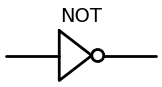

In [12]:
logic.Not().label('NOT')

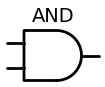

In [13]:
logic.And().label('AND')

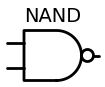

In [14]:
logic.Nand().label('NAND')

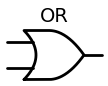

In [15]:
logic.Or().label('OR')

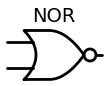

In [16]:
logic.Nor().label('NOR')

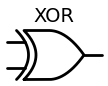

In [17]:
logic.Xor().label('XOR')

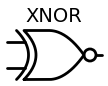

In [18]:
logic.Xnor().label('XNOR')

## Exemplos

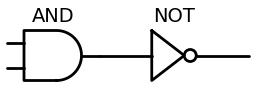

In [19]:
with schemdraw.Drawing() as d:
    d += logic.And().label('AND')
    d += logic.Not().right().label('NOT')
    d.draw()

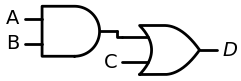

In [20]:
# Draws the circuit for F = (A and B) or C
with logicparse('(A and B) or C', outlabel='$D$') as d:
    # d.draw() or d.save('boolean_circuit.svg')
    pass

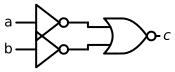

In [21]:
d = logicparse('not (not a or not b)', outlabel='$c$')
d

# Cirtuito 1: (a AND b) OR (NOT c)

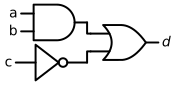

In [22]:
d = logicparse('(a and b) or (not c)', outlabel='$d$')
d

# Apêndice

In [23]:
import pyzx

qubit_amount = 5
gate_count = 8

# Generate a random circuit of Clifford+T gates
circuit = pyzx.generate.cliffordT(qubit_amount, gate_count)

# Draw the circuit (works well in a Jupyter environment)
pyzx.draw(circuit)

# Referências

* [Luminescent properties of PbX quantum dots](https://www.researchgate.net/publication/327671865_Luminescent_properties_of_Pb-based_PbX_colloidal_quantum_dots_CQDs_in_vacuum_on_silicon_and_integrated_with_a_silicon-on-insulator_SOI_photonic_integrated_circuit_PIC/figures?lo=1)
* https://www.researchgate.net/publication/363833055_Modelling_Logic_Gates_in_Python
* https://www.digitalocean.com/community/tutorials/logic-gates-in-python
* https://www.geeksforgeeks.org/logic-gates-in-python/
* https://gamedevacademy.org/python-logic-gates-tutorial-complete-guide/
* https://schemdraw.readthedocs.io/en/stable/elements/logic.html
* https://www.geeksforgeeks.org/python/logic-gates-in-python/